## Case Study 1

#### Załadowanie bibliotek

In [384]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import plotly.express as px
from mlxtend.classifier import StackingCVClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import pickle

#### Wczytanie danych

In [385]:
dane = pd.read_csv("../datasets/case1.csv", delimiter=";",index_col=0)

print(dane.shape)
dane.head()

(9841, 50)


,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [386]:
dane.describe()

,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [387]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9841 entries, 0 to 9840
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Index                                                 9841 non-null   int64  
 1   Address                                               9841 non-null   object 
 2   FLAG                                                  9841 non-null   int64  
 3   Avg min between sent tnx                              9841 non-null   float64
 4   Avg min between received tnx                          9841 non-null   float64
 5   Time Diff between first and last (Mins)               9841 non-null   float64
 6   Sent tnx                                              9841 non-null   int64  
 7   Received Tnx                                          9841 non-null   int64  
 8   Number of Created Contracts                           9841 non-

In [388]:
#usunięcie dwóch pierwszych kolumn
dane = dane.iloc[:,2:]

In [389]:
# Przekształcenie zmiennych typu 'object' na 'category
categories = dane.select_dtypes('O').columns.astype('category')
dane[categories]

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,NaN,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [390]:
# Sprawdenie wartości liczbowych 'numericals'
numericals = dane.select_dtypes(include=['float','int']).columns
dane[numericals].describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In [391]:
# Badanie zmienności cech
dane[numericals].var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [392]:
# Szukanie unikalnych wartości w każdej kolumnie
for x in dane.columns:
    print(x,':',len(dane[x].unique()))

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
Total ERC20 tnxs : 301
ERC20 total Ether received : 3461
ERC20 total ether sent : 1416
ERC20 total Ether sent contract : 30
ERC20 uniq sent addr : 108
ERC20 uniq rec addr : 148
ERC20 uniq sent addr.1 : 5
ERC20 uniq rec contract addr : 124
ERC20 avg time between sent tnx : 2
ERC20 avg time between rec tnx : 2
ERC20 avg time between rec 2 tnx :

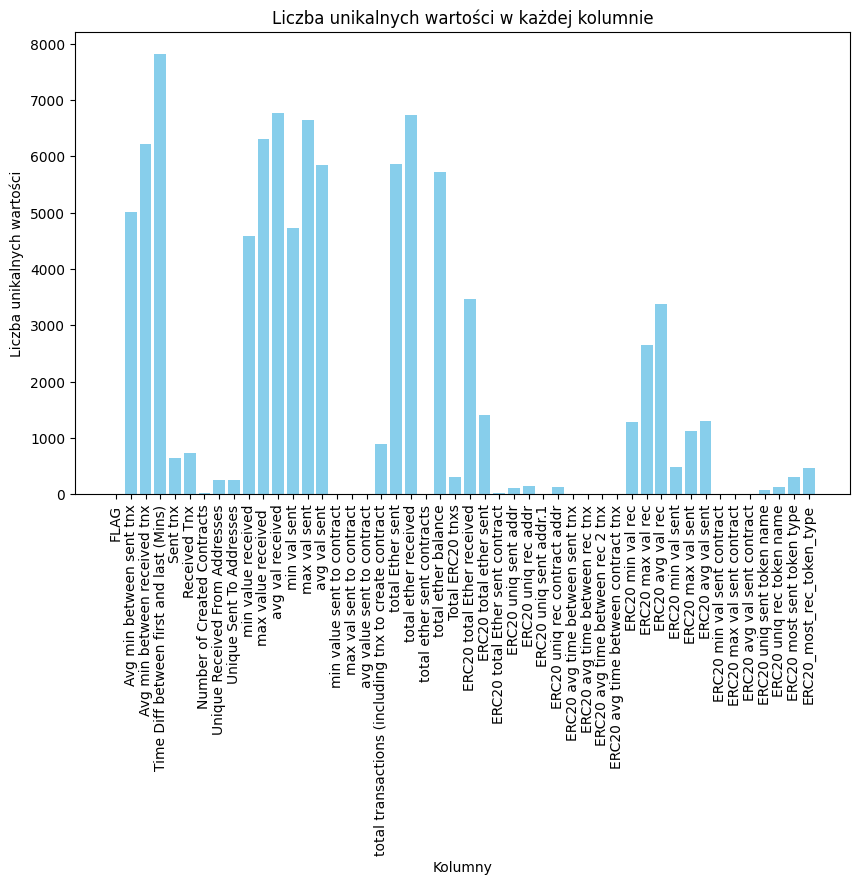

In [393]:
unikalne_wartosci = [len(dane[x].unique()) for x in dane.columns]
# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(dane.columns, unikalne_wartosci, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Kolumny')
plt.ylabel('Liczba unikalnych wartości')
plt.title('Liczba unikalnych wartości w każdej kolumnie')
plt.show()

In [394]:
kolumny_mała_unikalność = [dane.columns[i] for i, wartosc in enumerate(unikalne_wartosci) if wartosc < 100]
print("Kolumny z najmniejszą liczbą unikalnych wartości:")
print(kolumny_mała_unikalność)

Kolumny z najmniejszą liczbą unikalnych wartości:
['FLAG', 'Number of Created Contracts', 'min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total ether sent contracts', 'ERC20 total Ether sent contract', 'ERC20 uniq sent addr.1', 'ERC20 avg time between sent tnx', 'ERC20 avg time between rec tnx', 'ERC20 avg time between rec 2 tnx', 'ERC20 avg time between contract tnx', 'ERC20 min val sent contract', 'ERC20 max val sent contract', 'ERC20 avg val sent contract', 'ERC20 uniq sent token name']


FLAG
0    7662
1    2179
Name: count, dtype: int64


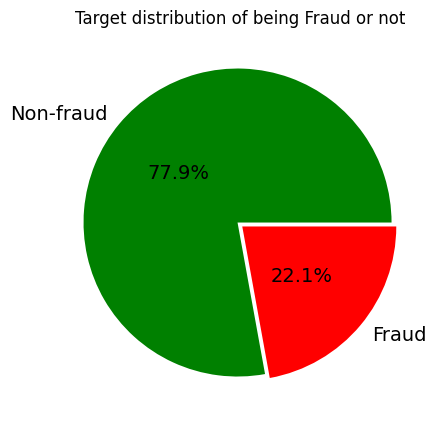

In [395]:
# Sprawdzenie rozkładu zmiennej docelowej
print(dane['FLAG'].value_counts())

pie, ax = plt.subplots(figsize=[10,5])
labels = ['Non-fraud', 'Fraud']
colors = ['green', 'red']
plt.pie(x = dane['FLAG'].value_counts(),autopct='%.1f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution of being Fraud or not')
plt.show()



#### Wyświetlenie braków danych

In [396]:
# Sprawdzenie braków danych
print(dane.isnull().sum())

FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val sent                                               0
avg val sent                                               0
min value sent to contract                                 0
max val sent to contract

<Figure size 1000x800 with 0 Axes>

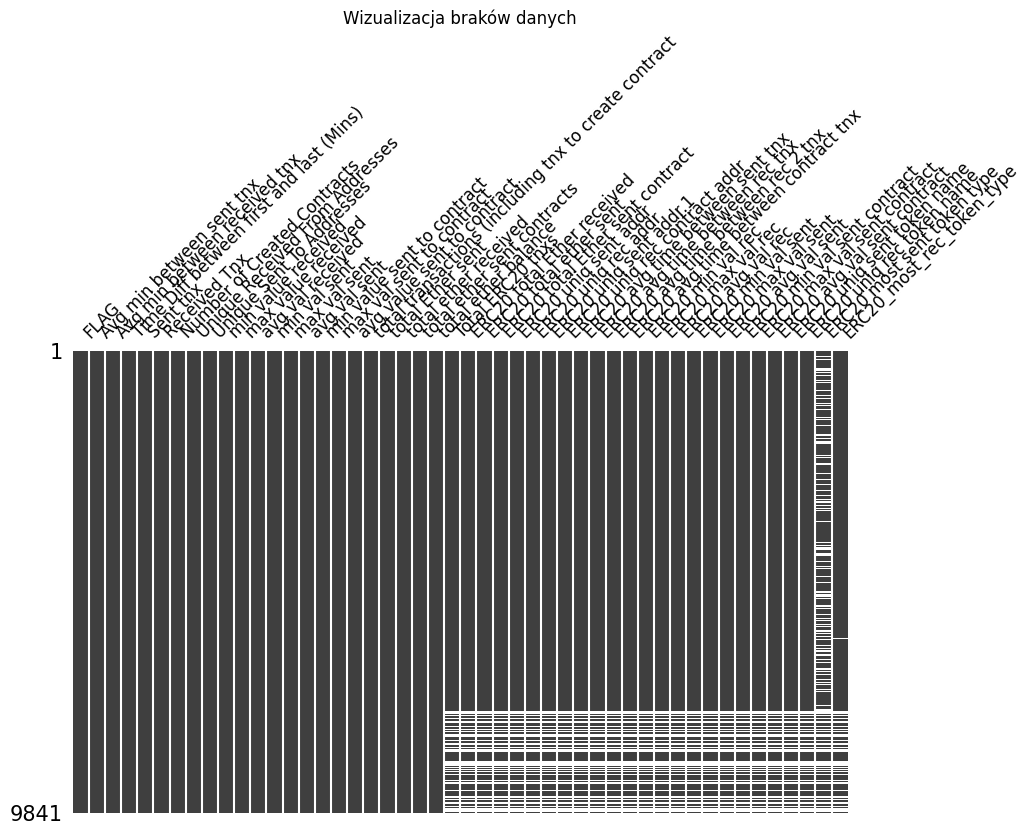

In [397]:
# Wizualizacja braków danych za pomocą macierzy heatmap
plt.figure(figsize=(10, 8))
msno.matrix(dane, figsize=(10, 6), fontsize=12, sparkline=False)
plt.title('Wizualizacja braków danych')
plt.show()

In [398]:
# Sprawdzenie kategorii 'categories'
for i in dane[categories].columns:
    print(f'The categorical column --{i}-- has --{len(dane[i].value_counts())}-- unique values')

The categorical column --ERC20 most sent token type-- has --304-- unique values
The categorical column --ERC20_most_rec_token_type-- has --466-- unique values


In [399]:
#wyświetlenie tych unilanych wartośći
display(np.unique(dane['ERC20 most sent token type'].astype(str)))
display(np.unique(dane['ERC20_most_rec_token_type'].astype(str)))

array(['\x01', ' ', '$7RIP$', "''", '0', '0xBitcoin Token',
       '0xcert Protocol Token', '1World', '300 Token', 'AION',
       'ARBITRAGE', 'AVT', 'AdBank', 'AdEx', 'Aditus', 'Adshares',
       'Aeron', 'Aeternity', 'Aigang', 'AirSwap', 'AirToken',
       'AnyCoinVer10', 'AppCoins', 'Aragon', 'ArcBlock',
       'Arcona Distribution Contract', 'Authorship', 'BAI', 'BANCA',
       'BANKEX', 'BAT', 'BCDN', 'BCG.to', 'BCShareS', 'BIX Token',
       'BMChain Token', 'BNB', 'BOMB', 'BUZCOIN', 'Bancor',
       'Banker Token', 'BinaryCoin', 'BitDice', 'BizCoin',
       'Blackmoon Crypto Token', 'BlockchainPoland', 'Blocktix',
       'Bounty0x', 'Brickblock', 'Bytom', 'CCRB', 'CRYPTOPUNKS',
       'Cai Token', 'CarTaxi', 'Cashaa', 'Celsius', 'Centra',
       'ChainLink Token', 'ChangeBank', 'CharterCoin', 'Cindicator',
       'Civic', 'Cobinhood', 'Cofoundit', 'CoinBene Coin', 'CoinBoin',
       'CoinDash', 'Countinghouse Fund', 'Covalent Token', 'Covesting',
       'Crypterium', 'Crypto.com

array(['\x01', ' ', '$P4C3', '0', '0xBitcoin Token', '1irst', '21Million',
       'A2A(B) STeX Exchange Token', 'ABCC invite', 'ABYSS',
       'AI Gaming Coin', 'AICRYPTO', 'AION', 'AIT', 'ALFA NTOK', 'ARP',
       'ATLANT', 'AdEx', 'Aeternity', 'AirCoin', 'Amber', 'Amplify',
       'An Etheal Promo', 'AnyCoinVer10', 'AppCoins', 'Aragon',
       'ArcBlock', 'Arcona Distribution Contract', 'ArtisTurba',
       'Asobicoin promo', 'Atonomi', 'Aurora', 'Authoreon', 'Authorship',
       'Avocado', 'Azbit', 'BAI', 'BANKEX', 'BAT', 'BAX', 'BBN', 'BCDN',
       'BCG.to', 'BCShareS', 'BCT Token', 'BMB', 'BNB', 'BOX Token',
       'BPTN', 'BRAT', 'BSB', 'BTOCoin', 'BUZCOIN', 'Bancor',
       'Beauty Coin', 'BeautyChain', 'Beth', 'Bi ecology Token',
       'BigBang Game Coin Token', 'Bigbom', 'Bilian', 'BinaryCoin',
       'Biograffi', 'BitAir', 'BitCAD', 'BitClave',
       'BitClave-ConsumerActivityToken', 'BitDegree', 'Bitcoin EOS',
       'Bitcoineum', 'BizCoin', 'BlitzPredict',
       'Blockc

###### Większość tokenów występuje tylko raz. Dlatego postanowiono usunąć te dwie kolumny, gdyż nie wnoszą one znaczącej informacji do analizy. 

In [400]:
# drop categorical columns
dane.drop(columns=['ERC20 most sent token type', 'ERC20_most_rec_token_type'], inplace=True)

In [401]:
# Zastąpienie brakujących wartości za pomocą mediany 
dane.fillna(dane.median(), inplace=True)

##### Usunięcie cech, dla których wariancja wynosi zero.

###### W delszej częśći zdecydowano się na usunięcie cech dla których wariancja wyniosła 0. Ze względu na brak zróżnicowania między jej wartościami stwierdzono, że nie wnosi ona żadnej dodatkowej informacji do modelu.

In [402]:
# Filtrowanie cech z wariancją 0
no_var = dane.var() == 0
print(dane.var()[no_var])
print('\n')

#  Usunięcie cech, dla których wariancja wynosi zero
dane.drop(dane.var()[no_var].index, axis = 1, inplace = True)
print(dane.var())
print(dane.shape)

ERC20 avg time between sent tnx        0.0
ERC20 avg time between rec tnx         0.0
ERC20 avg time between rec 2 tnx       0.0
ERC20 avg time between contract tnx    0.0
ERC20 min val sent contract            0.0
ERC20 max val sent contract            0.0
ERC20 avg val sent contract            0.0
dtype: float64


FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062

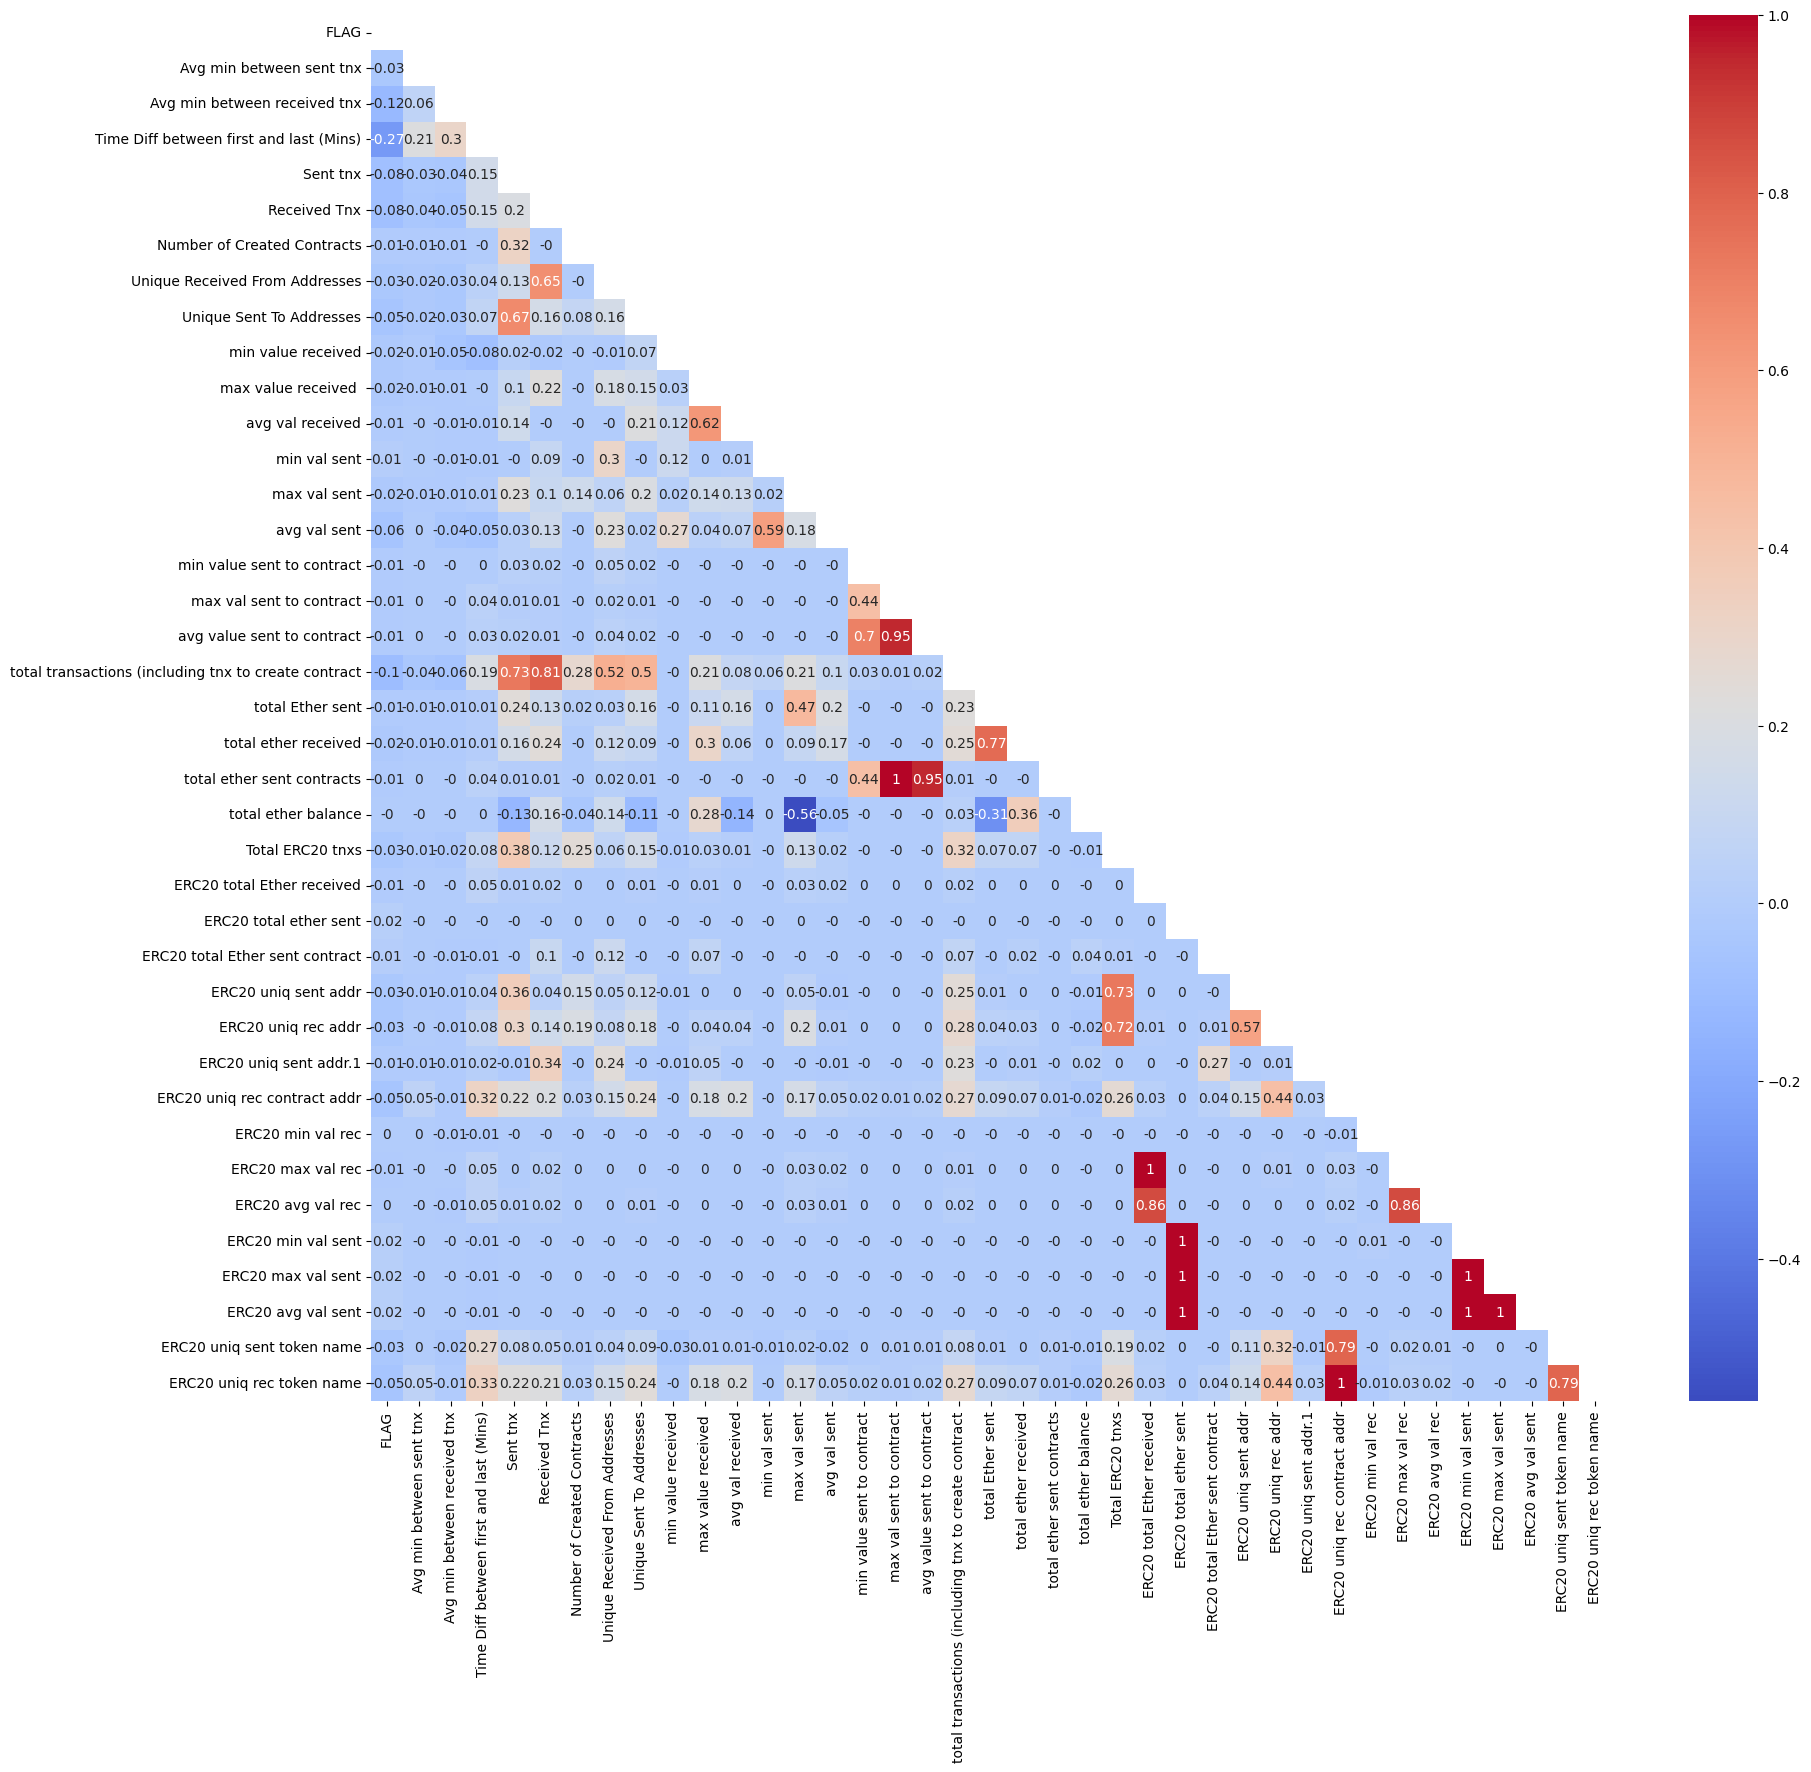

In [403]:
#Generowanie macierzy korelacji
numeric_dane = feature_dane = dane.select_dtypes(include=np.number) #
corr = numeric_dane.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20,18))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm')


plt.show()

In [404]:
# Szukanie silnej korelacji powyżej 0.95
correlation_threshold = 0.95
reduced_corr_matrix = corr.mask(mask)
corr_matrix_unstacked = reduced_corr_matrix.unstack()
similar_features = corr_matrix_unstacked[abs(corr_matrix_unstacked) >= correlation_threshold].reset_index().rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2', 0: 'Absolute Correlation'})
similar_features.sort_values(by="Absolute Correlation",ascending=False)

,feature_1,feature_2,Absolute Correlation
1,max val sent to contract,total ether sent contracts,1.00
3,ERC20 total Ether received,ERC20 max val rec,1.00
4,ERC20 total ether sent,ERC20 min val sent,1.00
5,ERC20 total ether sent,ERC20 max val sent,1.00
6,ERC20 total ether sent,ERC20 avg val sent,1.00
7,ERC20 uniq rec contract addr,ERC20 uniq rec token name,1.00
8,ERC20 min val sent,ERC20 max val sent,1.00
9,ERC20 min val sent,ERC20 avg val sent,1.00
10,ERC20 max val sent,ERC20 avg val sent,1.00
0,max val sent to contract,avg value sent to contract,0.95


In [405]:
#Redukcja wymiarów - Usunięcie jednej z silnie skorelowanych cech 
drop =['total ether sent contracts', 
        'ERC20 max val rec', 
        'ERC20 min val sent',
        'ERC20 max val sent', 
        'ERC20 total ether sent',
        'ERC20 uniq rec contract addr',  
        'ERC20 avg val sent',  
        'max val sent to contract',  
        'ERC20 uniq sent token name',
        'avg value sent to contract']
dane.drop(drop, axis=1, inplace=True)

###### Aby uniknąć nadmiarowości i złożoności modelu zdecydowano się na usunięcie jednej z silnie skolerowanych cech co może poprawić jego wydajność

### Przygotowanie danych

In [406]:
X = dane.iloc[:, 1:]
y = dane.iloc[:, 0]
print(X.shape, y.shape)

(9841, 28) (9841,)


#### Podział danych na zbiór treningowy i testowy

In [407]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7872, 28) (7872,)
(1969, 28) (1969,)


In [408]:
# Standaryzacja
sc = StandardScaler()
sc_train = sc.fit_transform(X_train)
sc_test = sc.transform(X_test)

In [409]:
#scaler = MinMaxScaler(feature_range = (0,1))
#scaler.fit(X_train)
#scaler_train = scaler.fit_transform(X_train)
#scaler_test = scaler.transform(X_test)


##### Oversampling using SMOTE

In [410]:

oversample = SMOTE()
print(f'Shape of the training before SMOTE: {sc_train.shape, y_train.shape}')

x_tr_resample, y_tr_resample = oversample.fit_resample(sc_train, y_train)
print(f'Shape of the training after SMOTE: {x_tr_resample.shape, y_tr_resample.shape}')

Shape of the training before SMOTE: ((7872, 28), (7872,))
Shape of the training after SMOTE: ((12230, 28), (12230,))


### Logistic Regression

In [411]:
#Logistic Regression
LR = LogisticRegression(random_state=42)
LR.fit(x_tr_resample, y_tr_resample)

y_pred = LR.predict(sc_test)

In [412]:
print(y_test.shape)
y_test.value_counts()

(1969,)


FLAG
0    1547
1     422
Name: count, dtype: int64

              precision    recall  f1-score   support

           0       0.95      0.61      0.74      1547
           1       0.38      0.87      0.53       422

    accuracy                           0.67      1969
   macro avg       0.66      0.74      0.64      1969
weighted avg       0.83      0.67      0.70      1969

[[944 603]
 [ 53 369]]


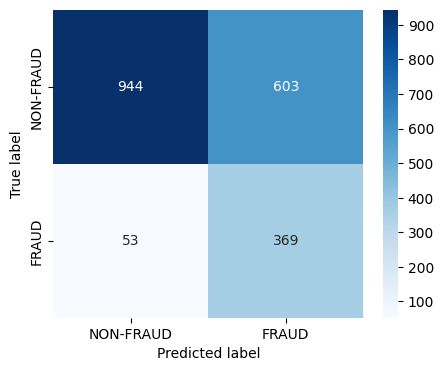

In [413]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

###### Analizując macierz pomyłek: Model LR prawidłowo zidentyfikował 369 (TP) przypadków Oszustw z 422 (P). Model regresji logistycznej błędnie zaklasyfikował 603 przypadków jako oszustwa (FP - False Positive) spośród 1547 przypadków, które w rzeczywistości nie były oszustwami.  Model ma tendencję do wykrywania mniej przypadków oszustw (367 na 422), ale błędnie klasyfikuje dużej liczby transakcji jako oszustwa, które w rzeczywistości nimi nie są (709 na 1547).

### Random Forest

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1547
           1       0.96      0.97      0.97       422

    accuracy                           0.99      1969
   macro avg       0.98      0.98      0.98      1969
weighted avg       0.99      0.99      0.99      1969



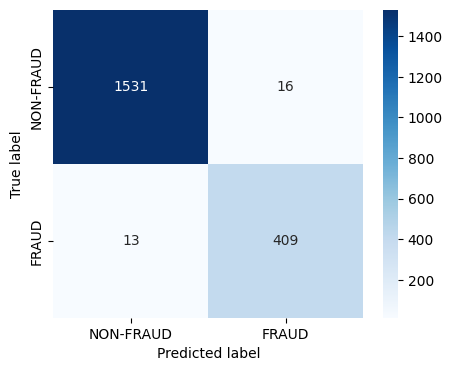

In [414]:
#RandomForest Classifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_tr_resample, y_tr_resample)

# Transform test features
scaler_test = sc.transform(X_test)

y_pred = RF.predict(scaler_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


###### Model RF daje bardziej efektywne wyniki. FP, jak i FN są znacznie zredukowane, co zwiększa precyzję. Model nie wykrył 13 przypadków OSZUSTW.

### KNN

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1547
           1       0.79      0.92      0.85       422

    accuracy                           0.93      1969
   macro avg       0.88      0.93      0.90      1969
weighted avg       0.94      0.93      0.93      1969



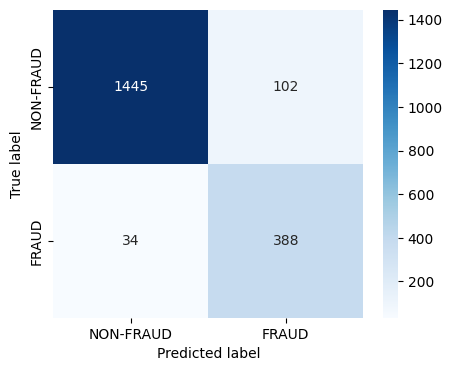

In [415]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_tr_resample, y_tr_resample)


# Transform test features
scaler_test = sc.transform(X_test)

y_pred = knn.predict(scaler_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


###### Wyniki klasyfikatora KNN są gorsze niż uzyskane dla modelu RandomForest (RF). W przypadku transakcji niebędących oszustwami, klasyfikator KNN błędnie zakwalifikował 102 przypadki jako oszustwa, podczas gdy w rzeczywistości były to transakcje niebędące oszustwami. Jeśli chodzi o identyfikację oszustw, KNN pominął 34 transakcjie spośród 422 przypadków, 


### Gradien Boosting

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1547
           1       0.91      0.98      0.94       422

    accuracy                           0.97      1969
   macro avg       0.95      0.97      0.96      1969
weighted avg       0.97      0.97      0.97      1969



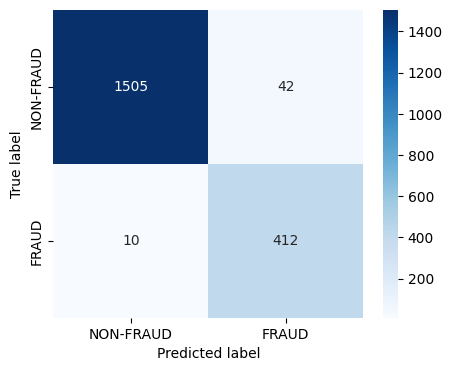

In [416]:

GB = GradientBoostingClassifier(random_state=42)
GB.fit(x_tr_resample, y_tr_resample)

# Transform test features
scaler_test = sc.transform(X_test)

y_pred = GB.predict(scaler_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


###### Wyniki Gradient Boosting pokazują, że radzi sobie gorzej niż RF, jeśli chodzi o transakcje NON-FRAUD, oznaczając 42 przypadki jako oszustwa, podczas gdy w rzeczywistości nie były one oszustwami. Z drugiej strony, jeśli chodzi o identyfikację OSZUSTW, GB pomija tylko 10 transakcji z 422, co sugeruje najlepszy wynik z uzyskanych.

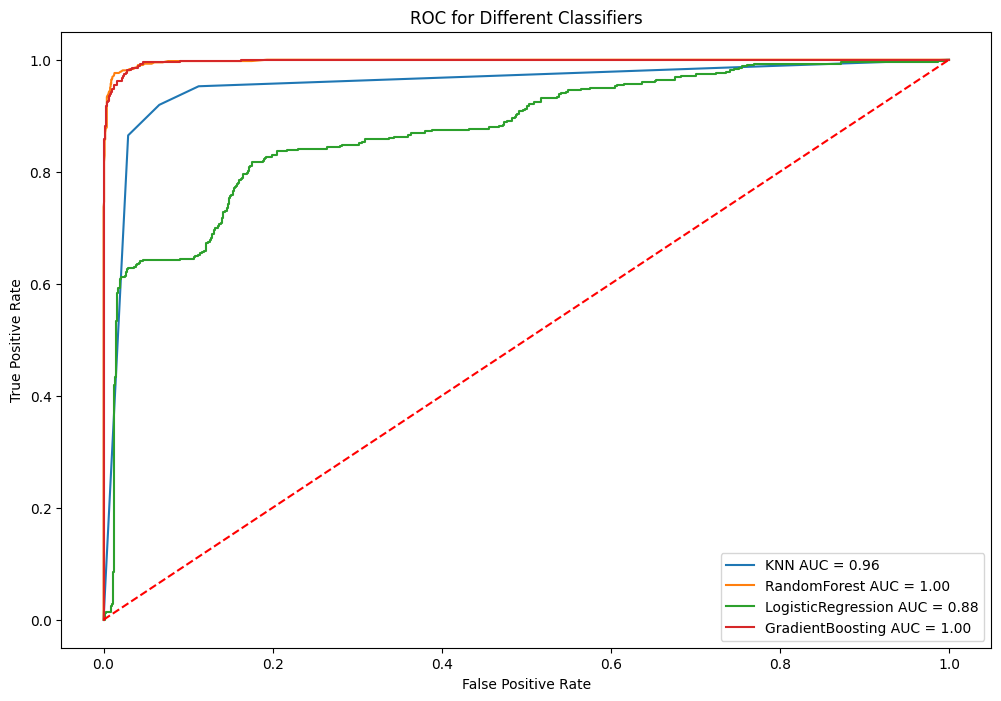

In [417]:
# Plotting AUC for KNN, RandomForest, LogisticRegression and GradientBoosting
models = [knn, RF, LR, GB]
model_names = ['KNN', 'RandomForest', 'LogisticRegression','GradientBoosting']

plt.figure(figsize=(12,8))
plt.title('ROC for Different Classifiers')

for model, name in zip(models, model_names):
    probs = model.predict_proba(scaler_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s AUC = %0.2f' % (name, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###### Po wygenerowaniu krzywej ROC widzimy, najlepiej poradził sobie RandomForest oraz GradientBoosting.

#### Grid Search

In [423]:
params_grid = {'n_estimators':[10,20],
               'max_depth':[2,3,4]}

grid = GridSearchCV(estimator=RF, param_grid=params_grid, scoring='recall', cv = 10, verbose = 0)

grid.fit(x_tr_resample, y_tr_resample)
print(f'Best params found for RF are: {grid.best_params_}')
print(f'Best recall obtained by the best params: {grid.best_score_}')

Best params found for RF are: {'max_depth': 4, 'n_estimators': 20}
Best recall obtained by the best params: 0.9525691837018494


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1547
           1       0.82      0.95      0.88       422

    accuracy                           0.94      1969
   macro avg       0.90      0.94      0.92      1969
weighted avg       0.95      0.94      0.94      1969



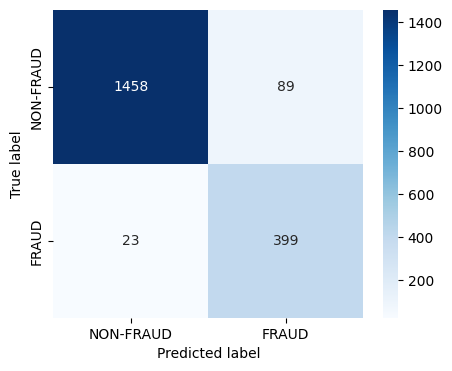

In [424]:
preds_best_RF = grid.best_estimator_.predict(sc_test)
print(classification_report(y_test, preds_best_RF))

cm = confusion_matrix(y_test, preds_best_RF)
class_names = ['NON-FRAUD', 'FRAUD']
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()




##### W ramach badania przeprowadzono kompleksową analizę danych, w tym obróbkę, przetwarzanie wstępne, redukcję wymiarów oraz zbudowano modele wykorzystując algorytmy uczenia maszynowego: regresję logistyczną, las losowy, k-NN oraz XGBoost. Po przeprowadzeniu testowania i oceny wszystkich modeli wybrano las losowy jako model końcowy. 